# What is this?
Its a Self Driving Car Using Convolutional Neural Networks Via Using NVIDIA Model Architecture for End To End Self Driving Car And For Simulation Using Udacity Open Source Unity Self Driving Car Simulator.

I have created my own dataset using Udacity simulator self-driving car training mode and after that, **I used a bigger dataset for other sources** on GitHub and trained my model on that dataset. For convenience you can use my data https://lnkd.in/dqwDUi7 to train Your model For more good datasets u can check these out

https://lnkd.in/dsXVYXR
Format: Image, latitude, longitude, gear, brake, throttle, steering angles and speed

Credits- 
NVIDIA's paper: End to End Learning for Self-Driving Cars for the inspiration and model structure.

In [209]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [210]:
import matplotlib.image as mpimg

In [211]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import ntpath

In [212]:
datadir = '/kaggle/input/selfdriving-car-dataset/data-master/'

In [213]:
columns = ['center','left','right','steering','throttle','reverse','speed']

In [214]:
dataset = pd.read_csv(os.path.join(datadir,'/kaggle/input/selfdriving-car-dataset/data-master/driving_log.csv'),names=columns)

In [215]:
os.path.join(datadir,'/kaggle/input/selfdriving-car-dataset/data-master/driving_log.csv')

'/kaggle/input/selfdriving-car-dataset/data-master/driving_log.csv'

In [216]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
1,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
2,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
3,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
4,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079


In [217]:
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [218]:
dataset['center'] = dataset['center'].apply(removePath)

In [219]:
dataset['left'] = dataset['left'].apply(removePath)

In [220]:
dataset['right'] = dataset['right'].apply(removePath)

In [221]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_10_17_16_36_30_865.jpg,left_2018_10_17_16_36_30_865.jpg,right_2018_10_17_16_36_30_865.jpg,0.0,0.0,0.0,0.000078
1,center_2018_10_17_16_36_30_966.jpg,left_2018_10_17_16_36_30_966.jpg,right_2018_10_17_16_36_30_966.jpg,0.0,0.0,0.0,0.000078
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.0,0.0,0.0,0.000079
3,center_2018_10_17_16_36_31_253.jpg,left_2018_10_17_16_36_31_253.jpg,right_2018_10_17_16_36_31_253.jpg,0.0,0.0,0.0,0.000078
4,center_2018_10_17_16_36_31_366.jpg,left_2018_10_17_16_36_31_366.jpg,right_2018_10_17_16_36_31_366.jpg,0.0,0.0,0.0,0.000079


In [222]:
num_bins = 25

In [223]:
hist,bins = np.histogram(dataset['steering'],num_bins)

In [224]:
print(hist)
print(bins)

[  48   16   13   15   21   36   48   69  161  174  337  239 5454   56
  160   82   97   99   37   25   32   15   12    5    8]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [225]:
center = (bins[:-1]+bins[1:])*0.5

In [226]:
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [227]:
center1 = []
for i in range(0,len(bins)-1):
  x = (bins[i] + bins[i+1]) * 0.5
  center1.append(x)

In [228]:
center1

[-0.96,
 -0.88,
 -0.8,
 -0.72,
 -0.6399999999999999,
 -0.56,
 -0.48,
 -0.39999999999999997,
 -0.32,
 -0.24,
 -0.15999999999999998,
 -0.08000000000000002,
 0.0,
 0.08000000000000007,
 0.16000000000000003,
 0.24,
 0.32000000000000006,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 0.96]

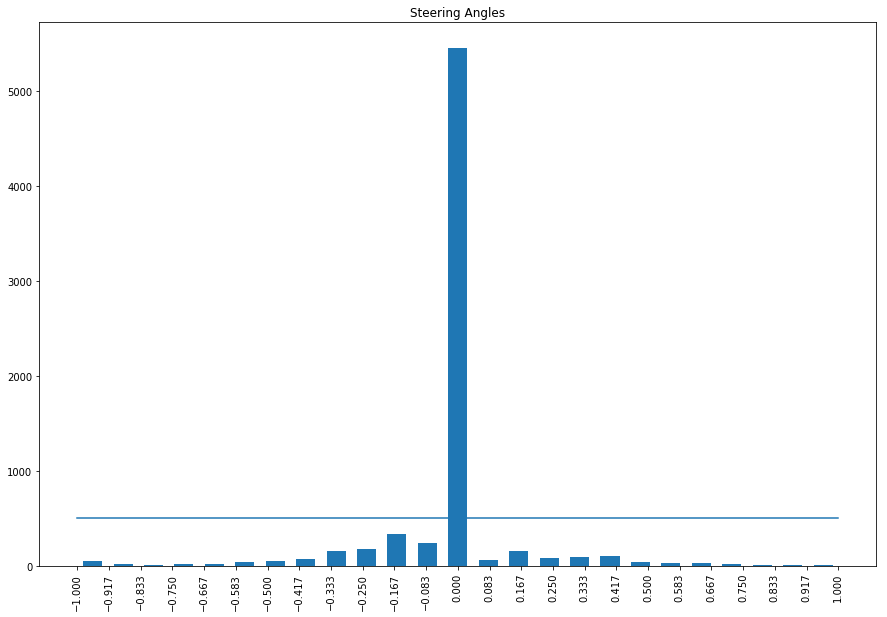

In [229]:
threshold = 500
plt.figure(figsize=(15,10))
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [230]:
remove_list = []
for i in range(num_bins):
  List = []
  for j in range(len(dataset['steering'])):
    if dataset['steering'][j] >= bins[i] and dataset['steering'][j] <= bins[i+1]:
      List.append(j)
  List = shuffle(List)
  List = List[threshold:]
  remove_list.extend(List)

In [231]:
len(dataset['steering']) 

7259

In [232]:
len(remove_list)

4954

In [233]:
dataset.drop(dataset.index[remove_list],inplace=True)

In [234]:
hist,_ = np.histogram(dataset['steering'],num_bins)

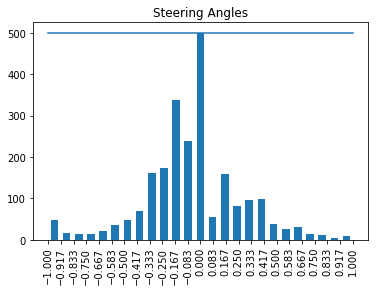

In [235]:
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [236]:
dataset.iloc[1]

center      center_2018_10_17_16_36_32_563.jpg
left          left_2018_10_17_16_36_32_563.jpg
right        right_2018_10_17_16_36_32_563.jpg
steering                                     0
throttle                                     0
reverse                                      0
speed                              7.79432e-05
Name: 14, dtype: object

In [237]:
datadir

'/kaggle/input/selfdriving-car-dataset/data-master/'

In [238]:
def loadImageSteering(datadir,dataset):
  imagePath = []
  steeringPath = []
  for i in range(len(dataset)):
    center = dataset.iloc[i][0]
    steering = float(dataset.iloc[i][3])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath = np.asarray(imagePath)
  steeringPath = np.asarray(steeringPath)
  return imagePath,steeringPath

In [239]:
dataset.iloc[0][0]

'center_2018_10_17_16_36_31_253.jpg'

In [240]:
imagePath,steeringPath = loadImageSteering(datadir+'/IMG',dataset)

In [241]:
imagePath[0]

'/kaggle/input/selfdriving-car-dataset/data-master//IMG/center_2018_10_17_16_36_31_253.jpg'

In [242]:
len(steeringPath)

2305

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
x_train,x_test,y_train,y_test = train_test_split(imagePath,steeringPath,random_state=6,test_size=0.2)

In [245]:
len(x_train)

1844

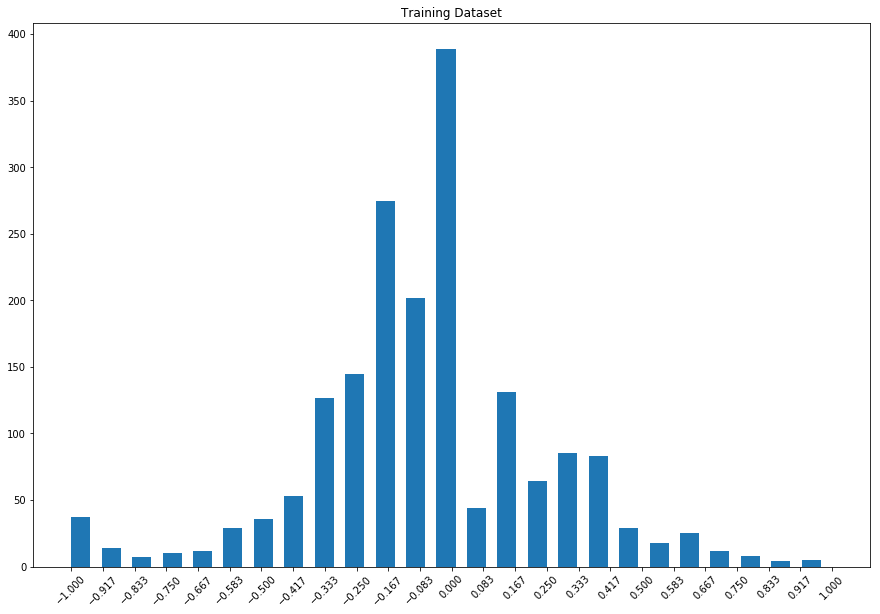

In [246]:
plt.figure(figsize=(15,10))
plt.hist(y_train,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Training Dataset")
plt.show()

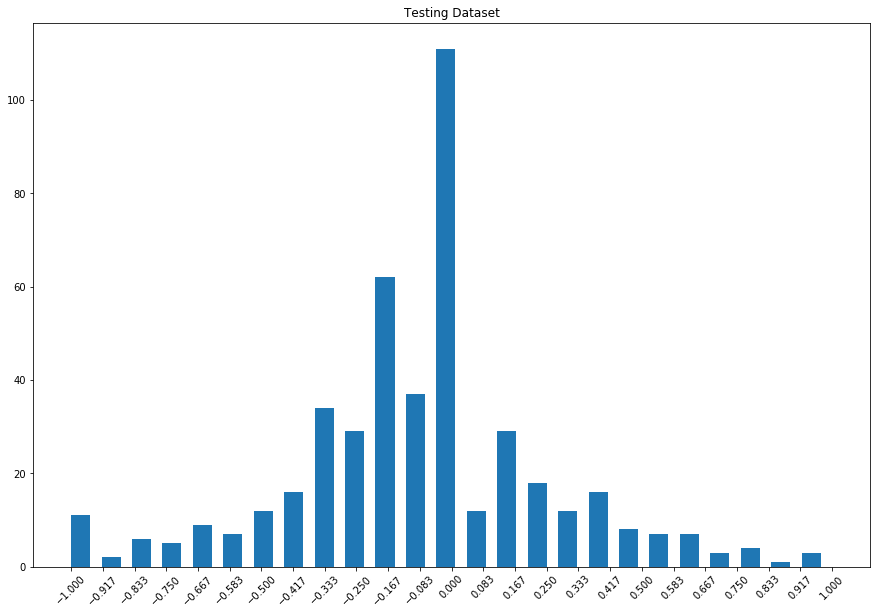

In [247]:
plt.figure(figsize=(15,10))
plt.hist(y_test,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Testing Dataset")
plt.show()

In [248]:
def imagePreprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

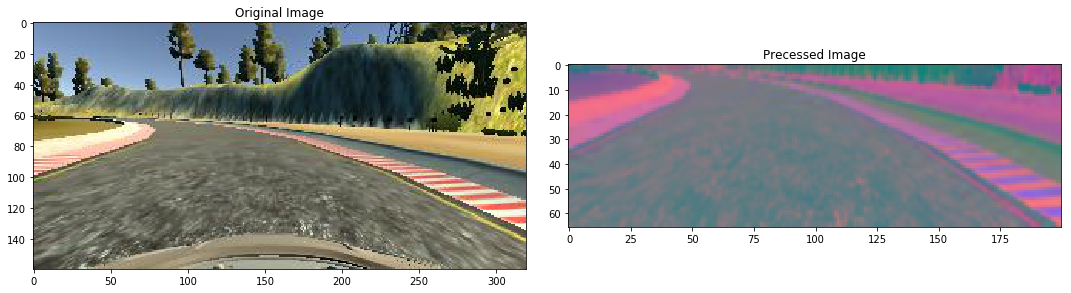

In [249]:
image = imagePath[1]
image = mpimg.imread(image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(imagePreprocessing(imagePath[1]))
axs[1].grid(False)
axs[1].set_title("Precessed Image")
plt.show()

In [250]:
x_train = np.array(list(map(imagePreprocessing,x_train)))

In [251]:

x_test = np.array(list(map(imagePreprocessing,x_test)))

In [252]:
import keras.backend as K

def accuracy(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    r2 = 1 - (SS_res / (SS_tot + K.epsilon()))
    return r2
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1, activation='linear')) 
  model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=[accuracy])

  return model

In [253]:
model = nvidiaModel()

In [254]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_37 (Dropout)         (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1152)            

In [255]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=100,shuffle=1,verbose=1)

Train on 1844 samples, validate on 461 samples
Epoch 1/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.4868 - accuracy: -4.1191 - val_loss: 0.1099 - val_accuracy: 0.0644
Epoch 2/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.1375 - accuracy: -0.4020 - val_loss: 0.1035 - val_accuracy: 0.1182
Epoch 3/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.1124 - accuracy: -0.1466 - val_loss: 0.0992 - val_accuracy: 0.1529
Epoch 4/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: -0.0998 - val_loss: 0.0910 - val_accuracy: 0.2306
Epoch 5/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.1053 - accuracy: -0.0667 - val_loss: 0.0895 - val_accuracy: 0.2406
Epoch 6/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0993 - accuracy: -0.0243 - val_loss: 0.0827 - val_accuracy: 0.3010
Epoch 7/30
1844/1844 [==============================] - 5s 3ms/step - loss: 0.0847 

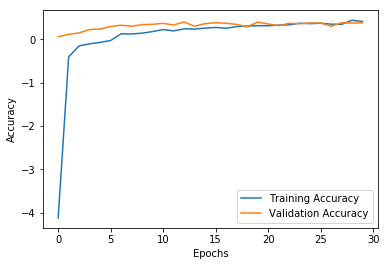

In [256]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

# Plot the R-squared values
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

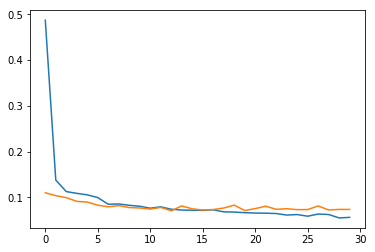

In [257]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [258]:
model.save('car.h5')

ModuleNotFoundError: No module named 'tensorflow_addons'